In [1]:
# 📦 Step 1: Install PyTorch Tabular
!pip install pytorch-tabular

In [2]:
# 📄 Title: AI-Driven Metrics for Evaluating Employee Efficiency in Remote Work Environments

# 🧠 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models import FTTransformerConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

# 📁 Step 3: Load & Preprocess Dataset
# Dataset includes features related to demographics, workload, remote frequency, and satisfaction
df = pd.read_csv("/content/drive/MyDrive/Lydia/SC2/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")

# Drop irrelevant identifiers and timestamp
df = df.drop(columns=["Employee_ID", "Hire_Date"])

# Rename target column to represent employee efficiency/performance score
df = df.rename(columns={"Performance_Score": "PerformanceScore"})

# Define categorical and continuous features
categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
continuous_cols = [
    col for col in df.columns
    if col not in categorical_cols + ["PerformanceScore", "Resigned"]
]

# Split dataset for training and evaluation
train, test = train_test_split(df, test_size=0.2, random_state=42)

# 📋 Step 4: Data Configuration for AI Modeling
data_config = DataConfig(
    target=["PerformanceScore"],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

# ⚙️ Step 5: FT-Transformer Model Setup
model_config = FTTransformerConfig(
    task="regression",                              # Predict continuous efficiency score
    metrics=["mean_squared_error", "r2_score"],     # Evaluation metrics
    learning_rate=1e-3,
    input_embed_dim=32,
    num_heads=4,
    num_attn_blocks=2,
    attn_dropout=0.1,
    add_norm_dropout=0.1,
    ff_dropout=0.1,
    ff_hidden_multiplier=4,
    transformer_activation="GEGLU",
    batch_norm_continuous_input=True,
    head="LinearHead"
)

# 🛠 Step 6: Training Configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    max_epochs=10,
    accelerator="auto",
    devices=1,
    load_best=False  # 🛑 Avoid checkpoint error due to PyTorch 2.6+
)

optimizer_config = OptimizerConfig()

# 🚀 Step 7: Initialize and Train FT-Transformer
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

tabular_model.fit(train=train, validation=test)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0004365158322401656
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_102c1914-c967-4e70-8d3a-99233b80e1ac.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_102c1914-c967-4e70-8d3a-99233b80e1ac.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.0004365158322401656. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │ 57.7 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  1.8 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 59.6 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 59.6 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 58                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


INFO:pytorch_tabular.tabular_model:Training the model completed


In [3]:
# 📊 Step 8: Evaluate Model Performance
results = tabular_model.evaluate(test)
print("📈 Evaluation Results:", results)

Output()

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.008994155563414097    │
│  test_mean_squared_error  │   0.008994155563414097    │
│       test_r2_score       │    0.9954997897148132     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.008994155563414097, 'test_mean_squared_error': 0.008994155563414097, 'test_r2_score': 0.9954997897148132}]


In [4]:
preds = tabular_model.predict(test)
print(preds.head())

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     2.024584
80184                     3.961130
19864                     3.035997
76699                     1.045111
92991                     3.995760


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Make predictions
preds = tabular_model.predict(test)

# Extract predicted and actual
y_true = test["PerformanceScore"].values
y_pred = preds["PerformanceScore_prediction"].values

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)
msle = mean_squared_log_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Print metrics
print("\n🔍 Additional Regression Metrics:")
print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"🧮 Mean Squared Log Error (MSLE): {msle:.4f}")
print(f"📊 Mean Absolute Percentage Error (MAPE): {mape:.2%}")

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value


🔍 Additional Regression Metrics:
📏 Mean Absolute Error (MAE): 0.0768
📉 Root Mean Squared Error (RMSE): 0.0948
📈 R² Score: 0.9955
🧮 Mean Squared Log Error (MSLE): 0.0010
📊 Mean Absolute Percentage Error (MAPE): 3.66%


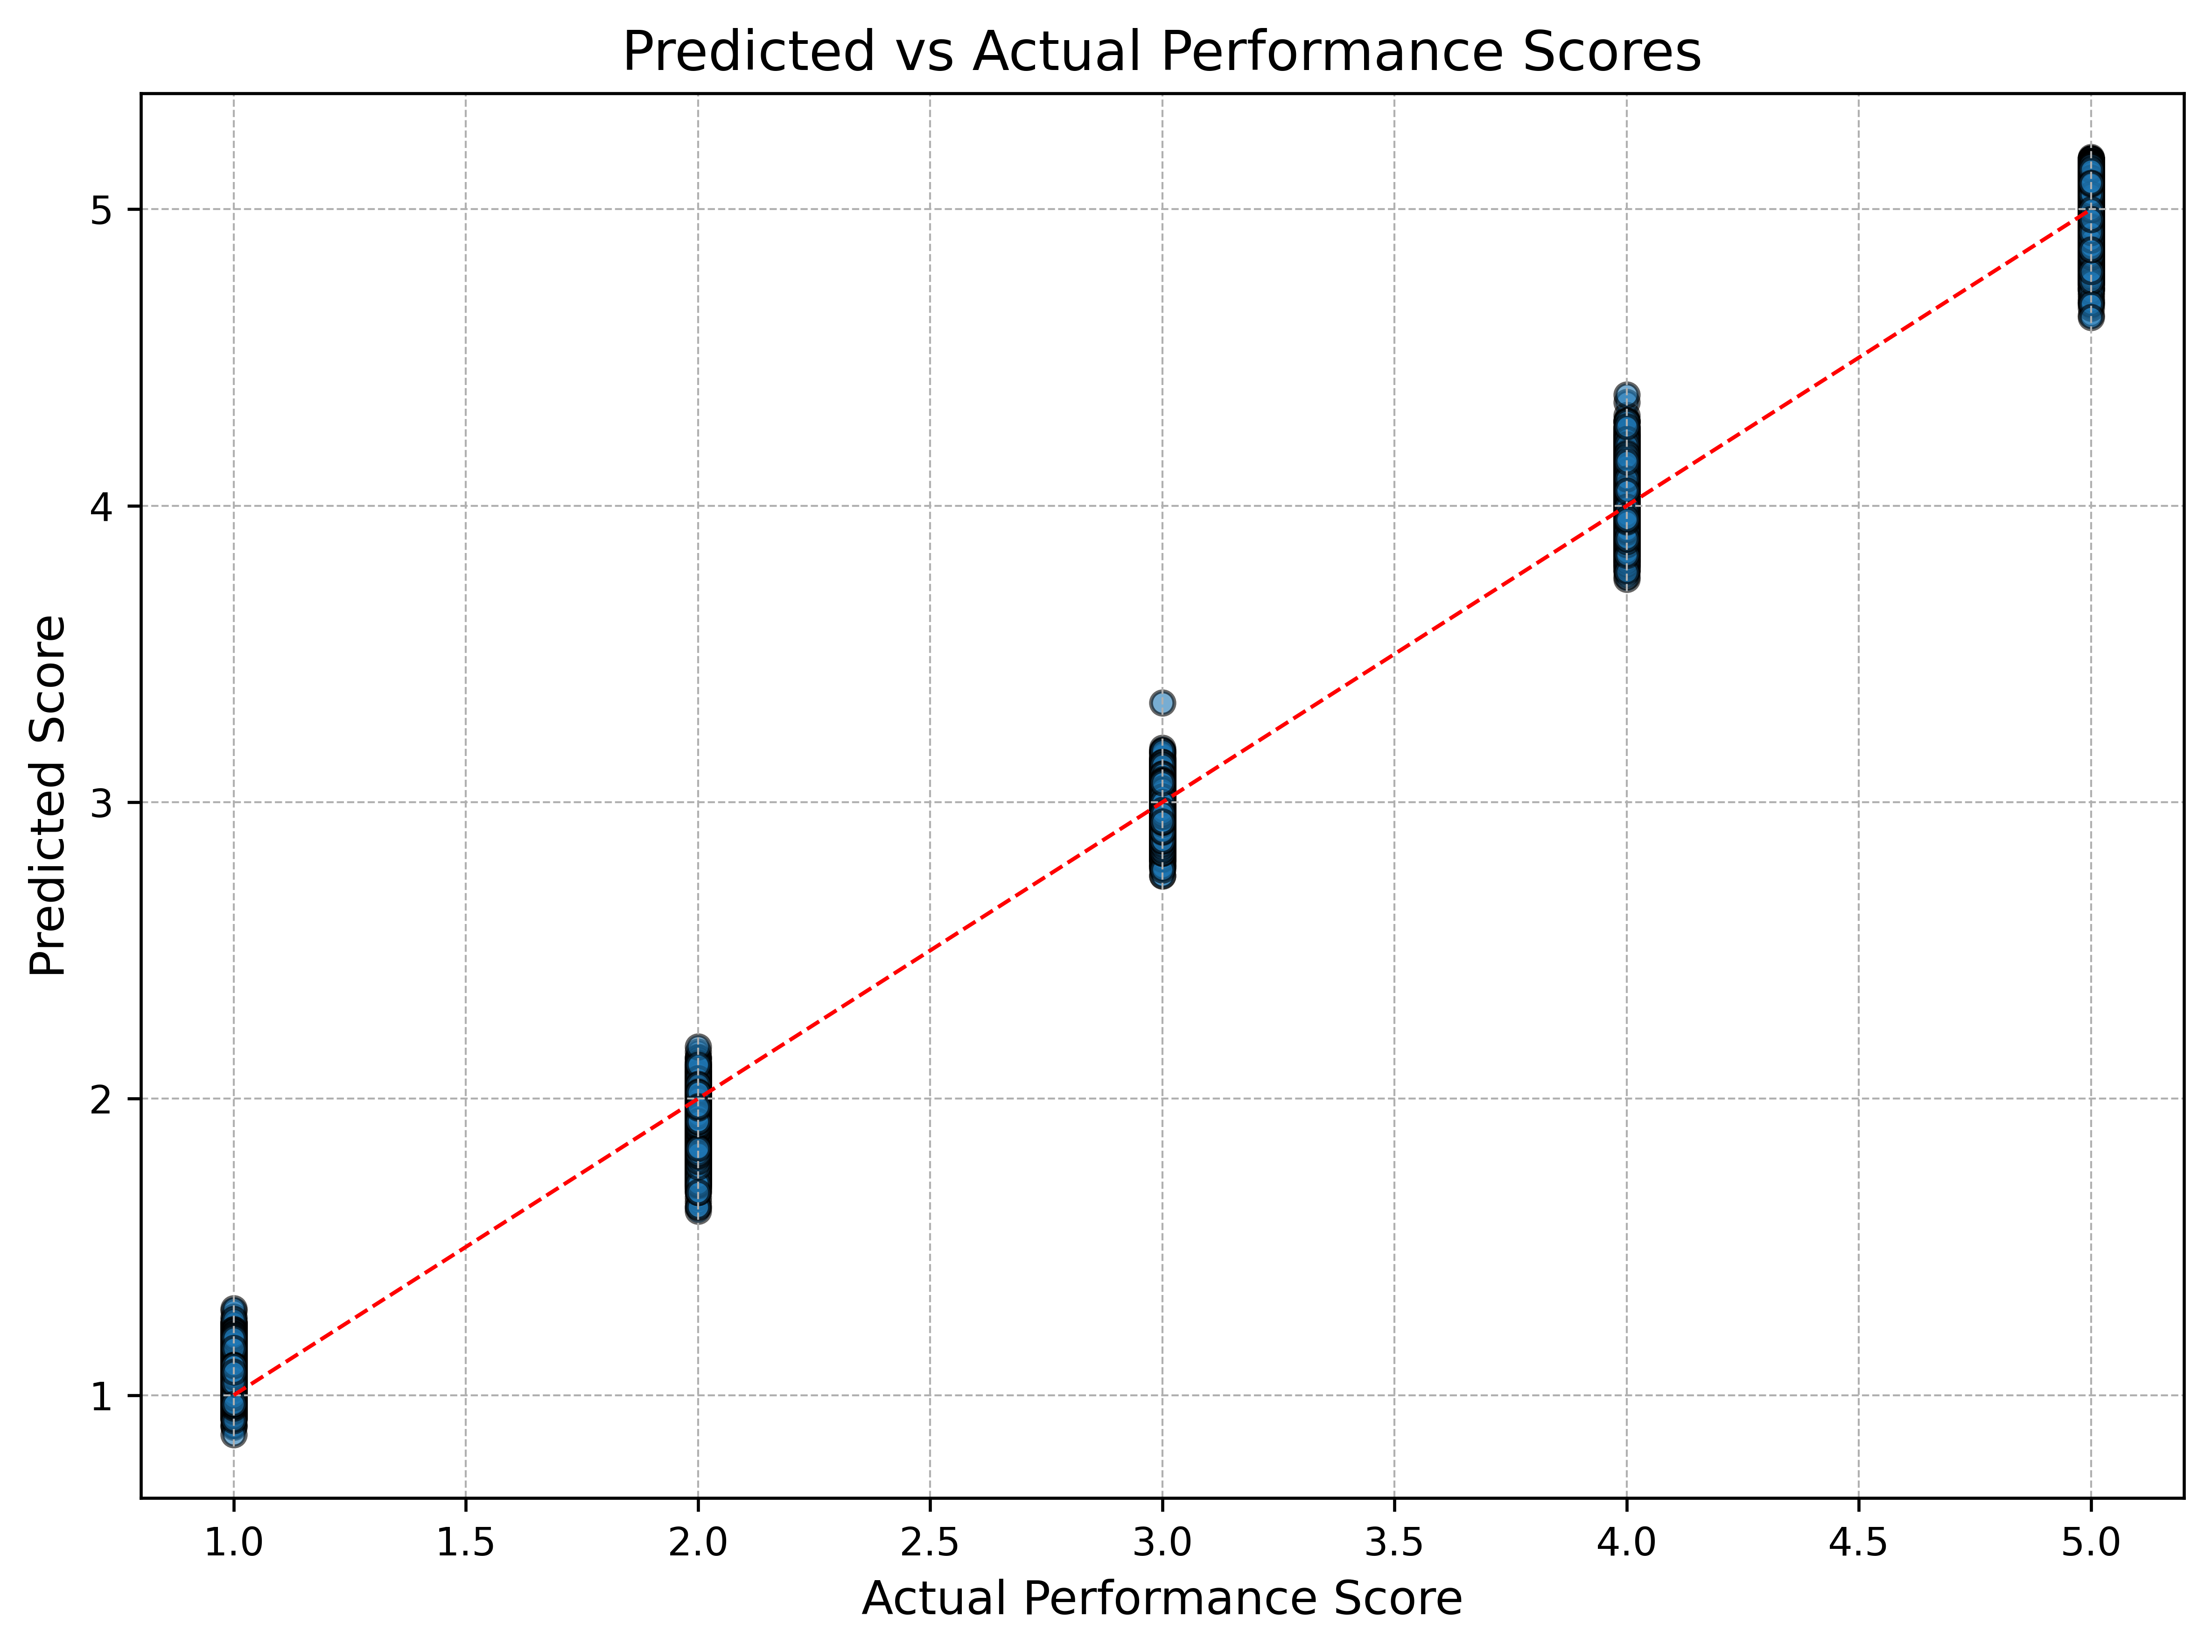

In [6]:
import matplotlib.pyplot as plt

# Extract actual and predicted values
actual = test["PerformanceScore"].values
predicted = preds["PerformanceScore_prediction"].values

# Plot
plt.figure(figsize=(8, 6), dpi=600)  # 👈 High-resolution
plt.scatter(actual, predicted, alpha=0.6, edgecolors='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=1)
plt.xlabel("Actual Performance Score", fontsize=12)
plt.ylabel("Predicted Score", fontsize=12)
plt.title("Predicted vs Actual Performance Scores", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

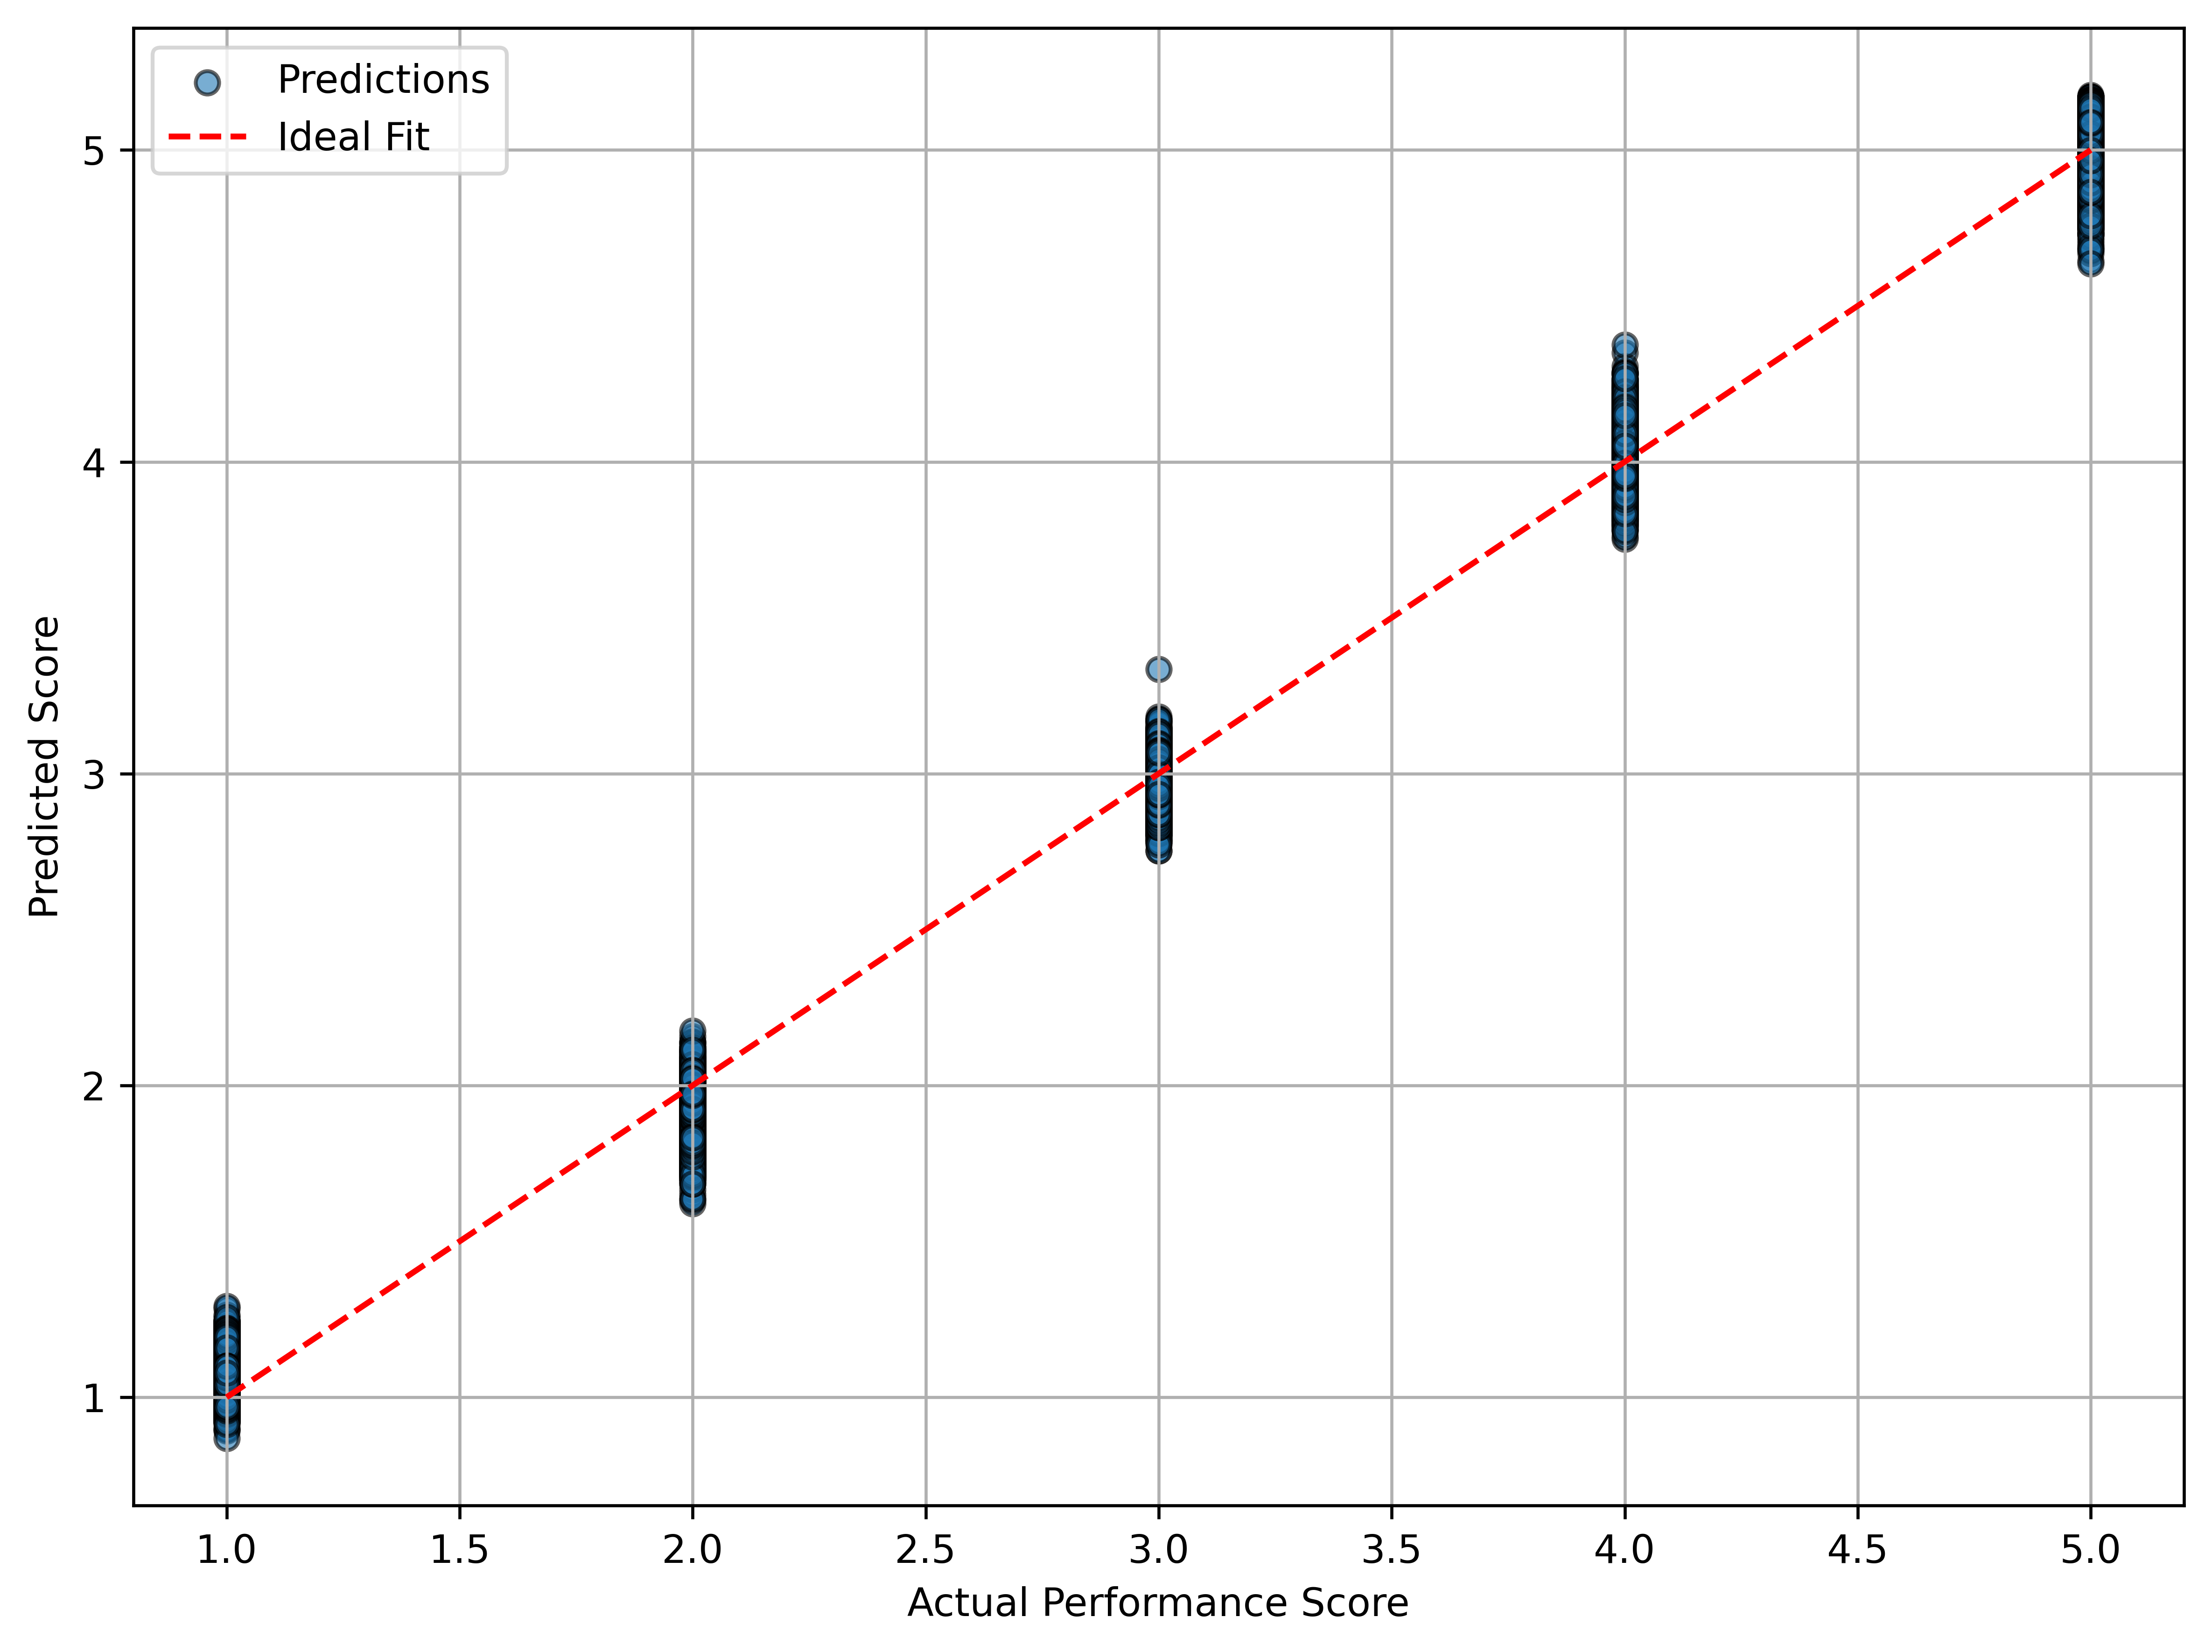

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=600)
plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', label="Predictions")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


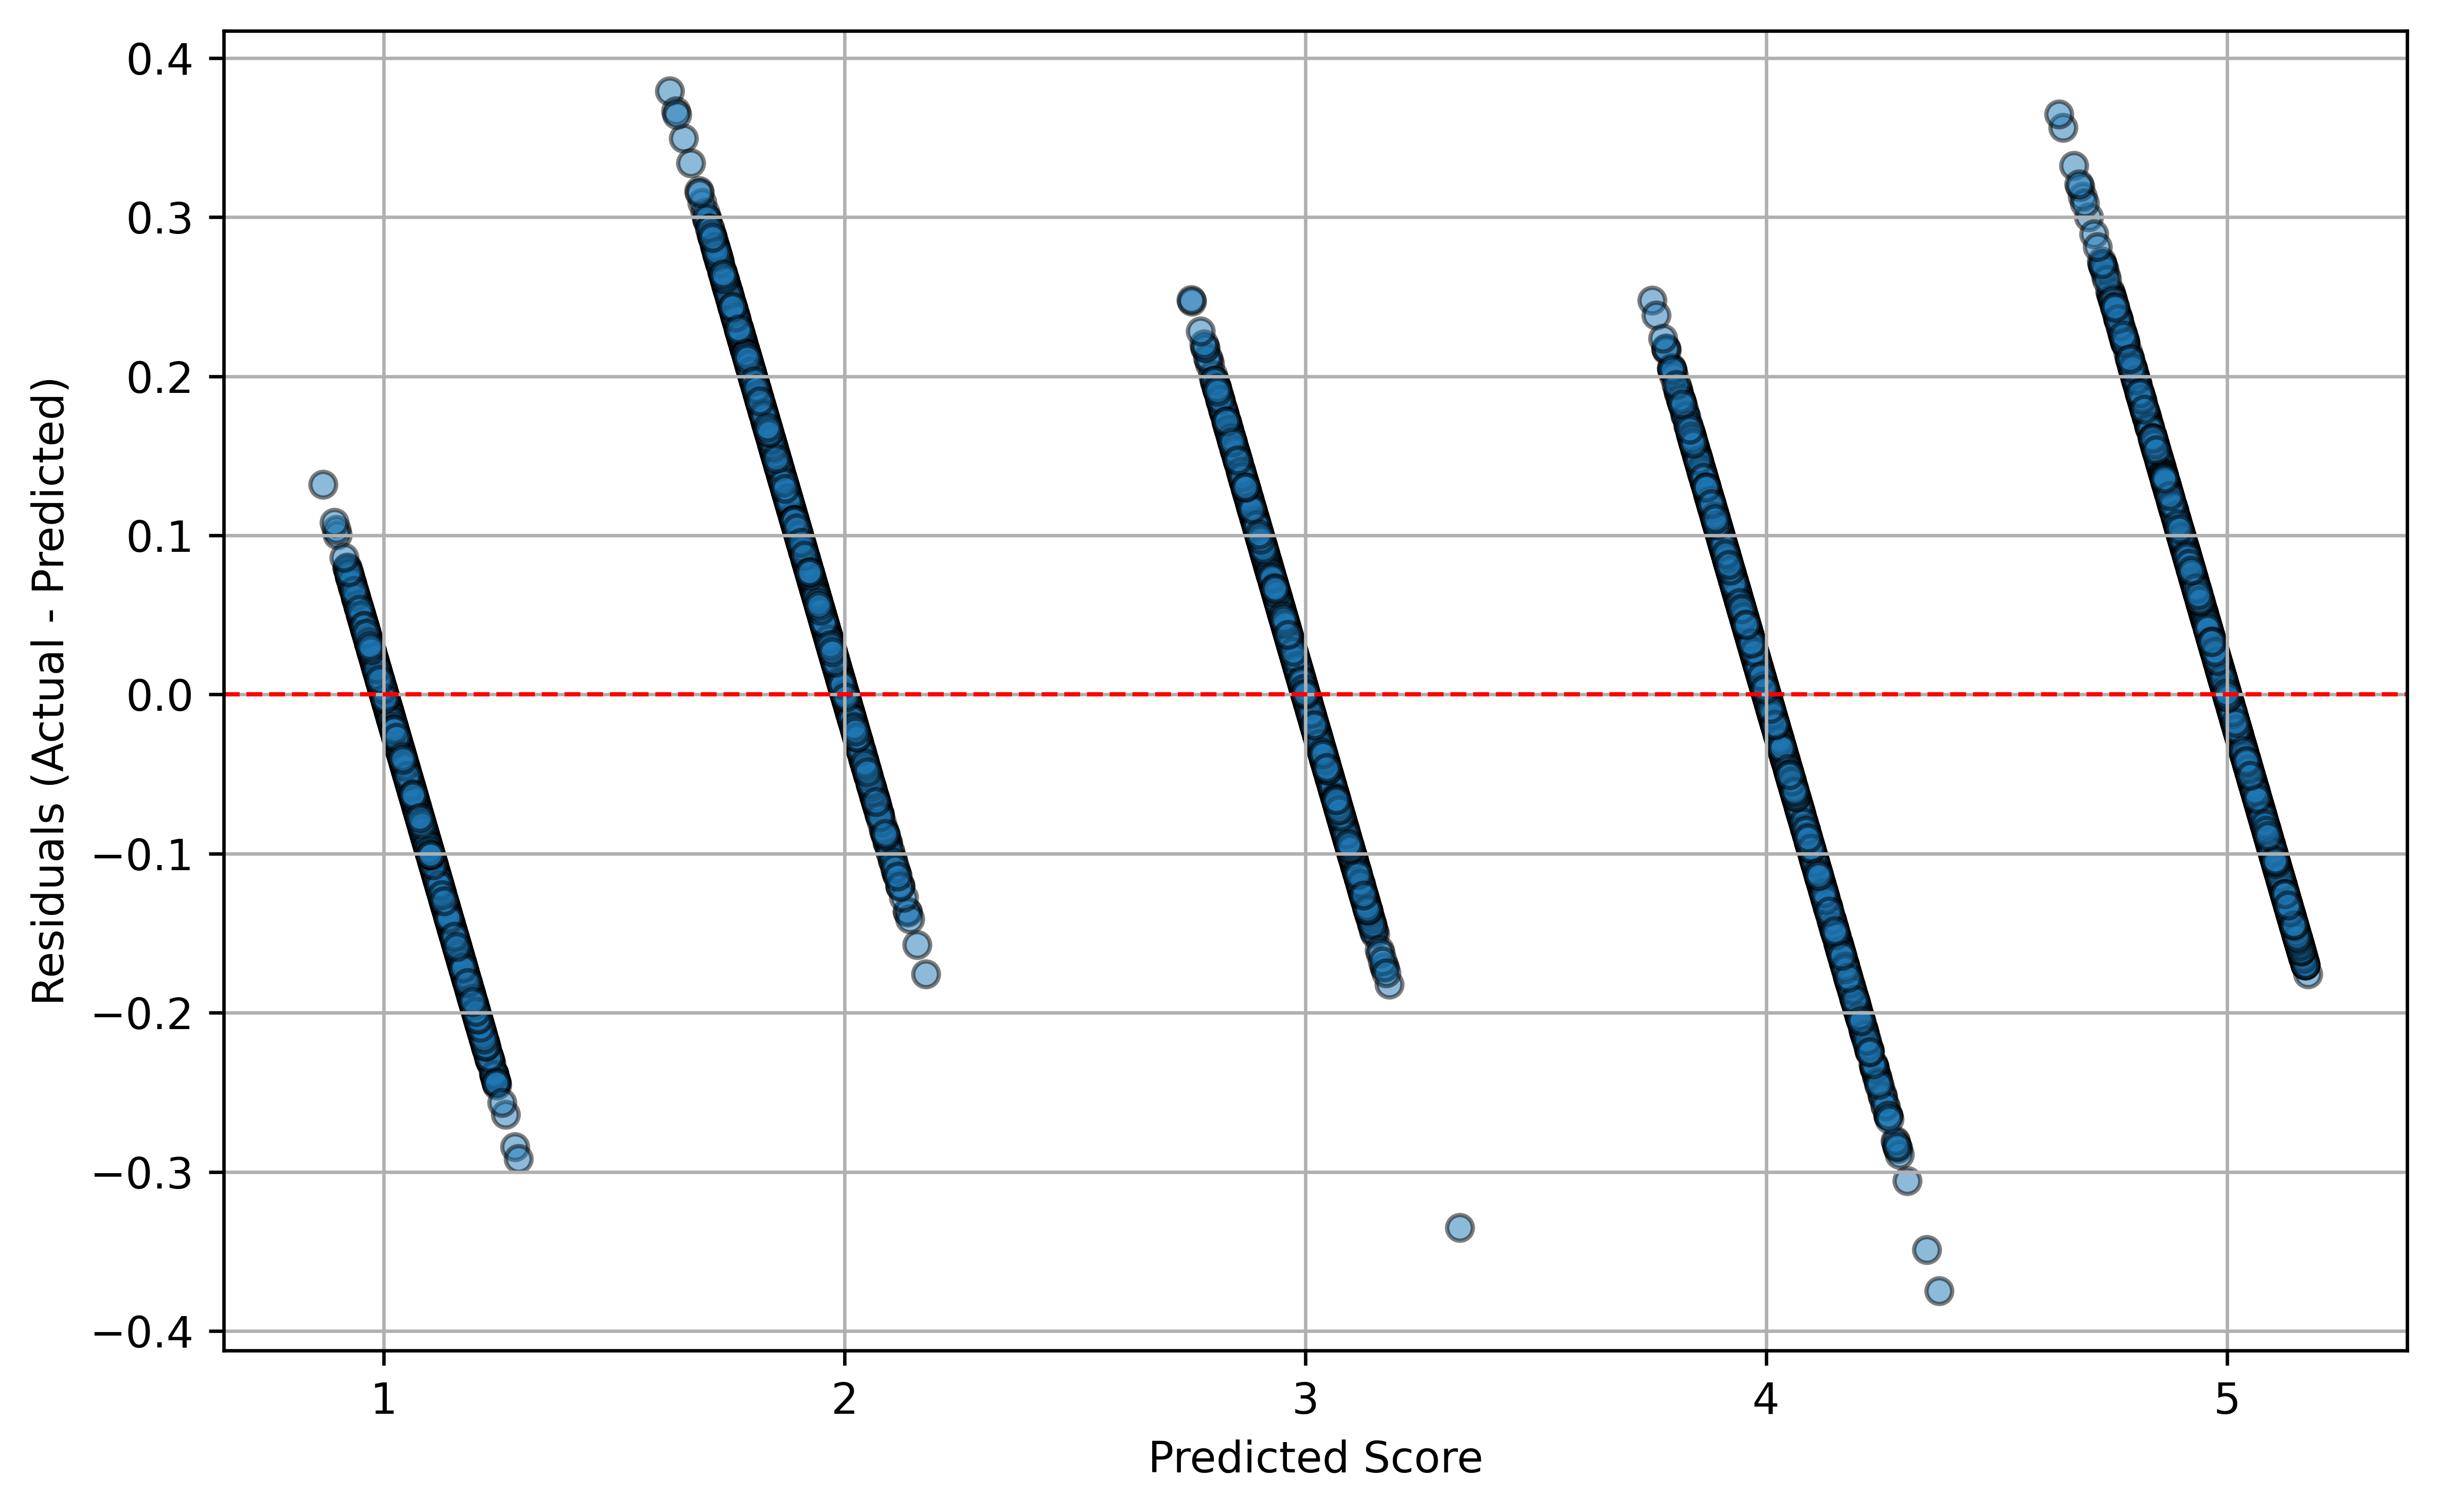

In [8]:
residuals = y_true - y_pred

plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Score")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

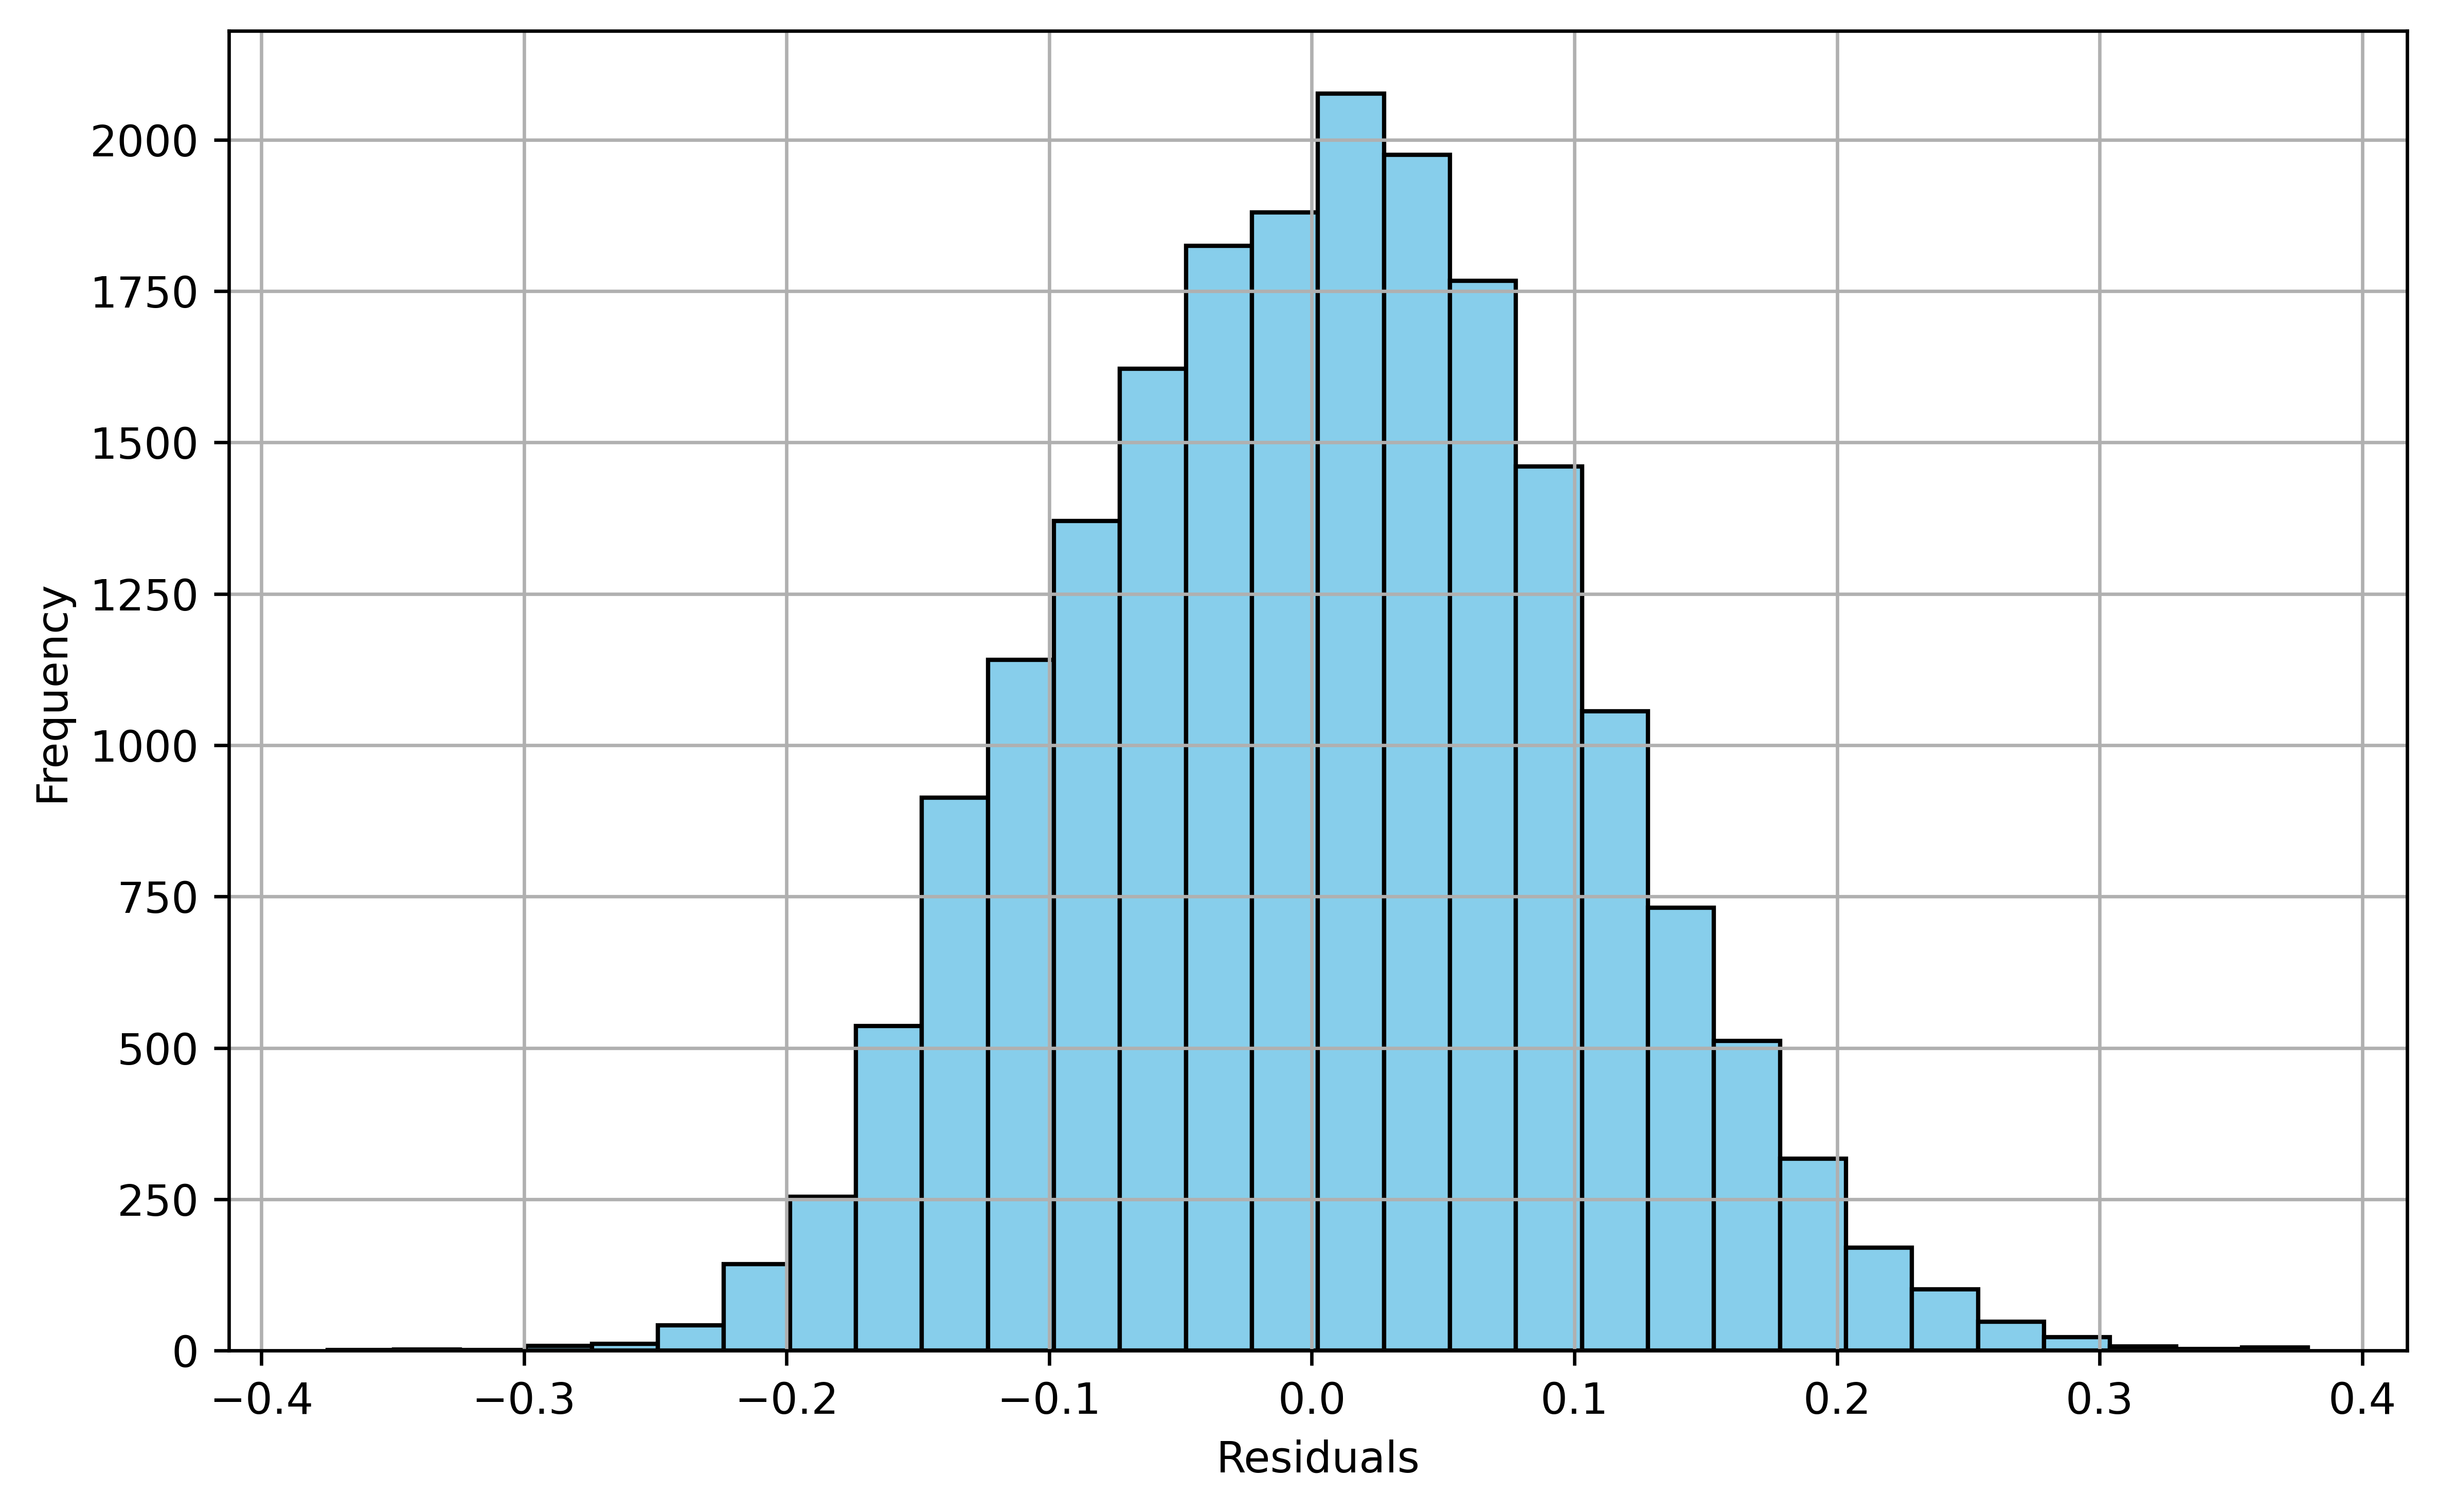

In [9]:
plt.figure(figsize=(8, 5), dpi=600)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

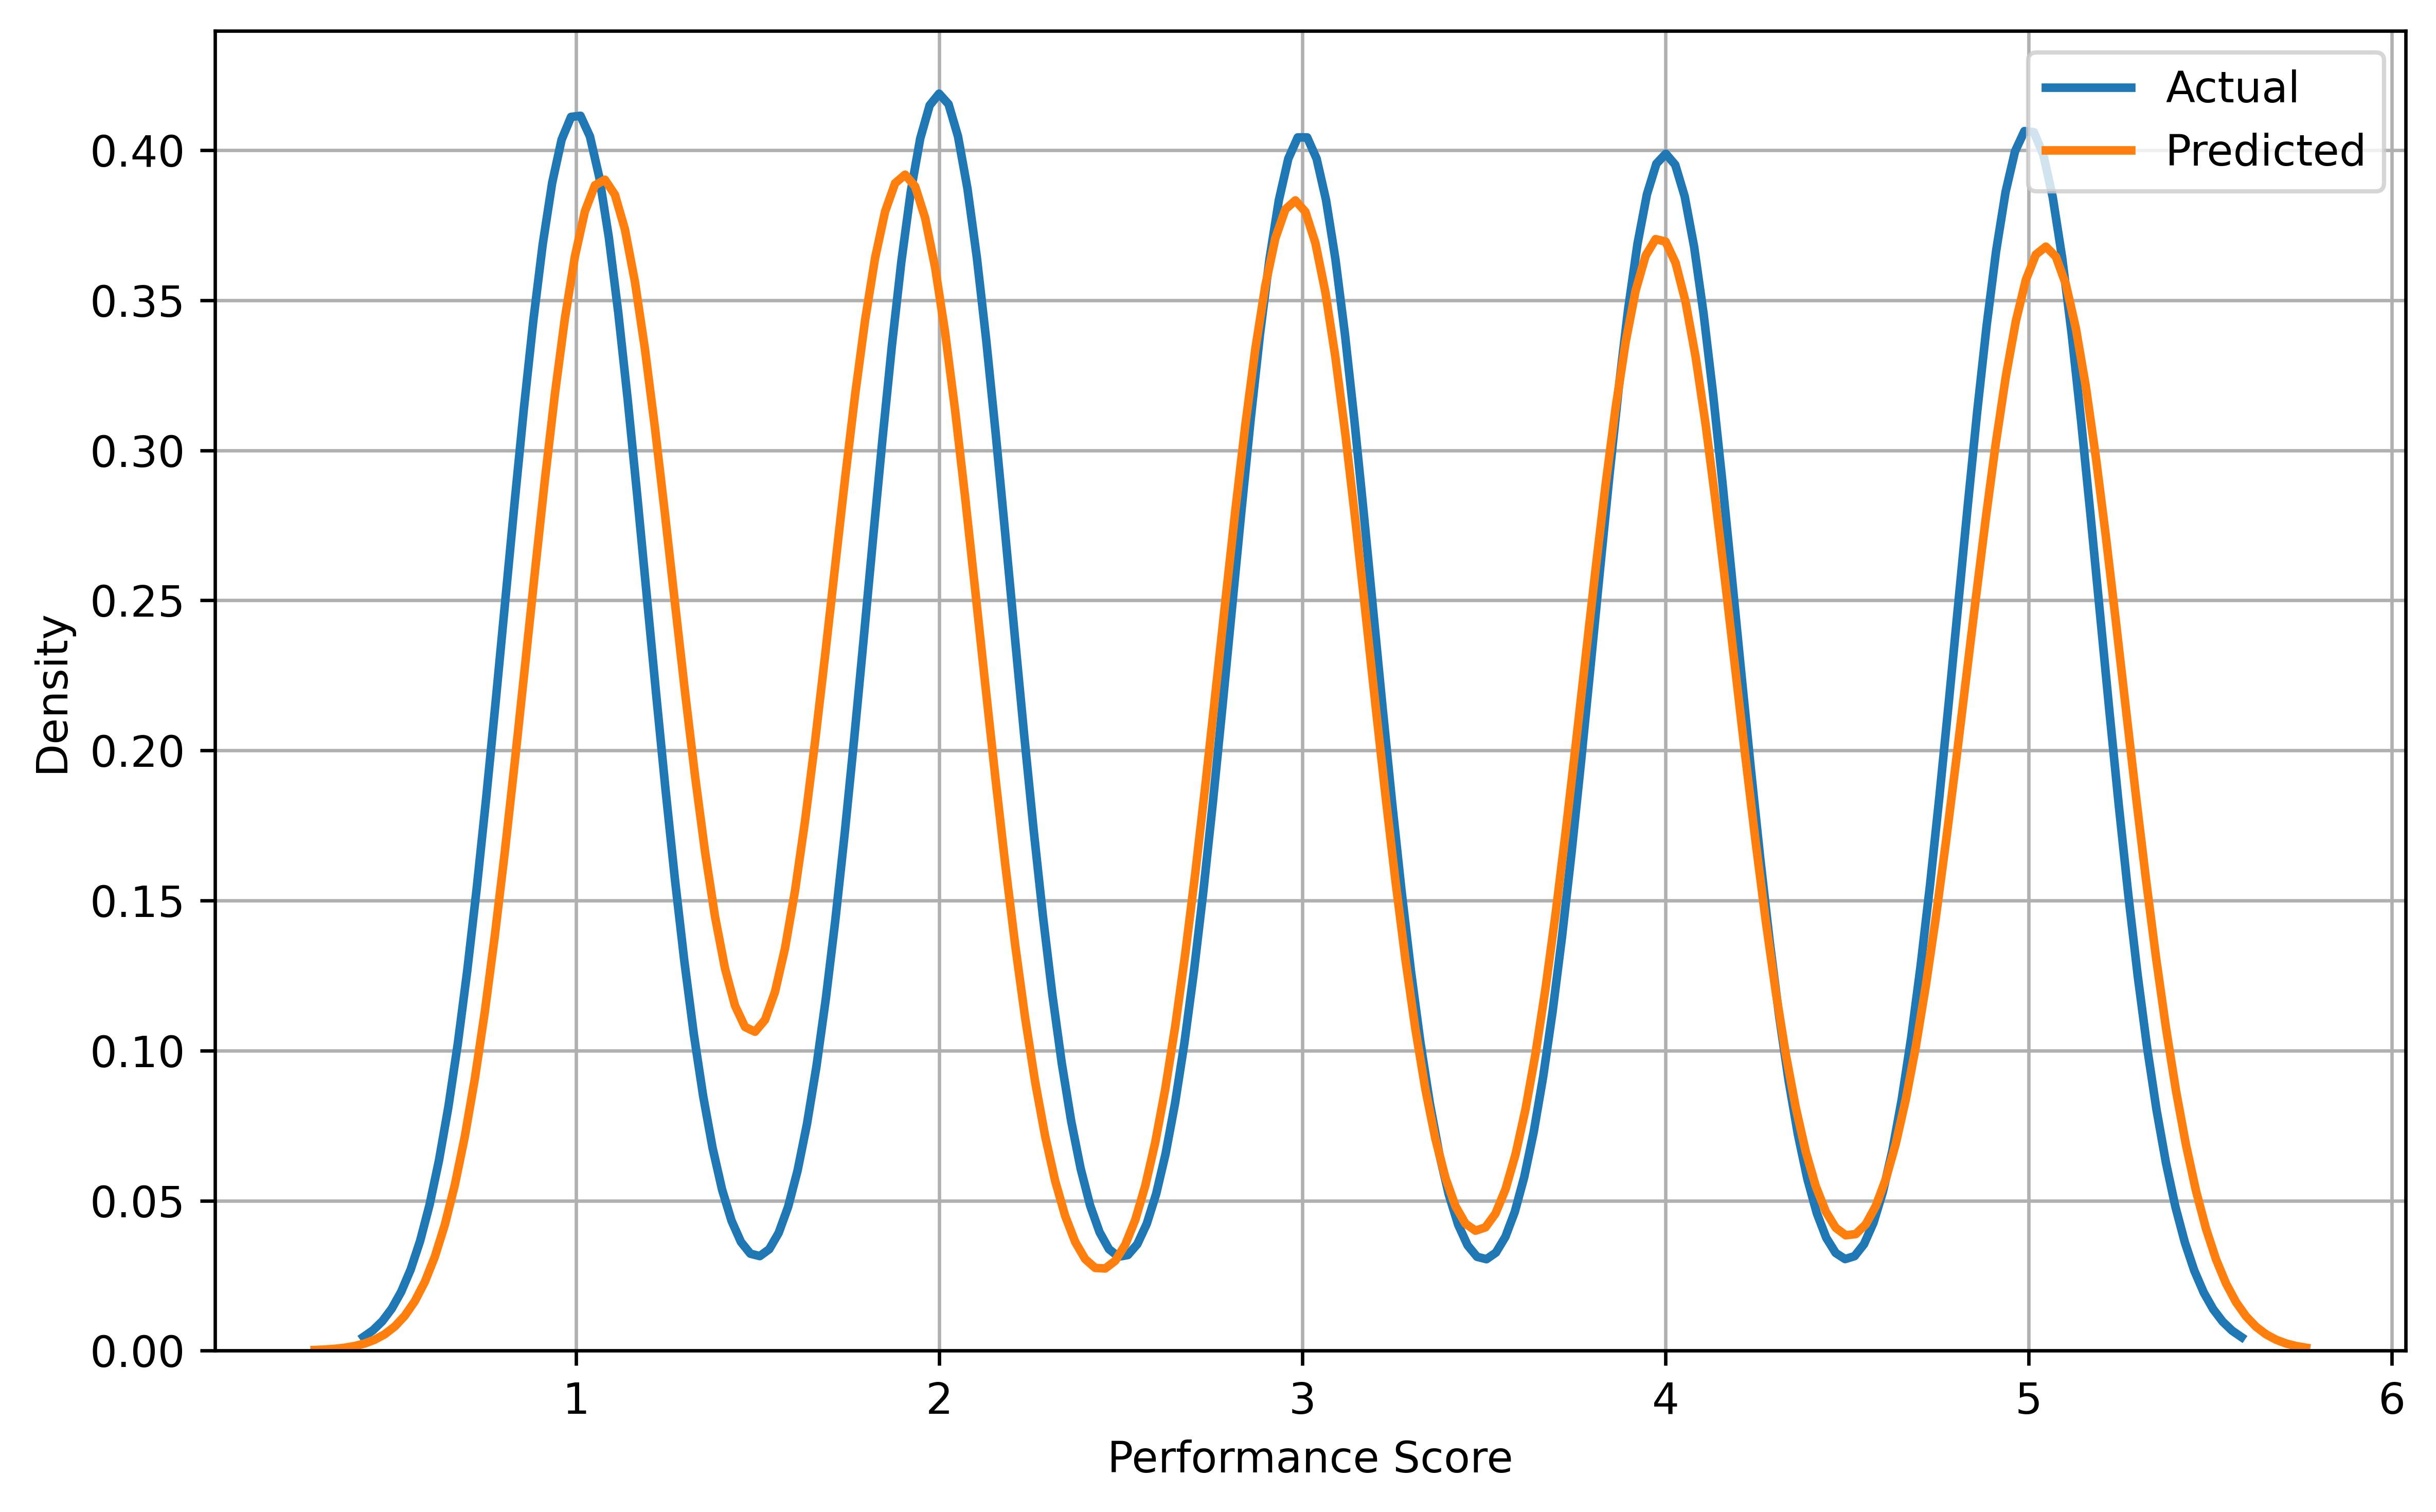

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5), dpi=600)
sns.kdeplot(y_true, label="Actual", linewidth=2)
sns.kdeplot(y_pred, label="Predicted", linewidth=2)
plt.xlabel("Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

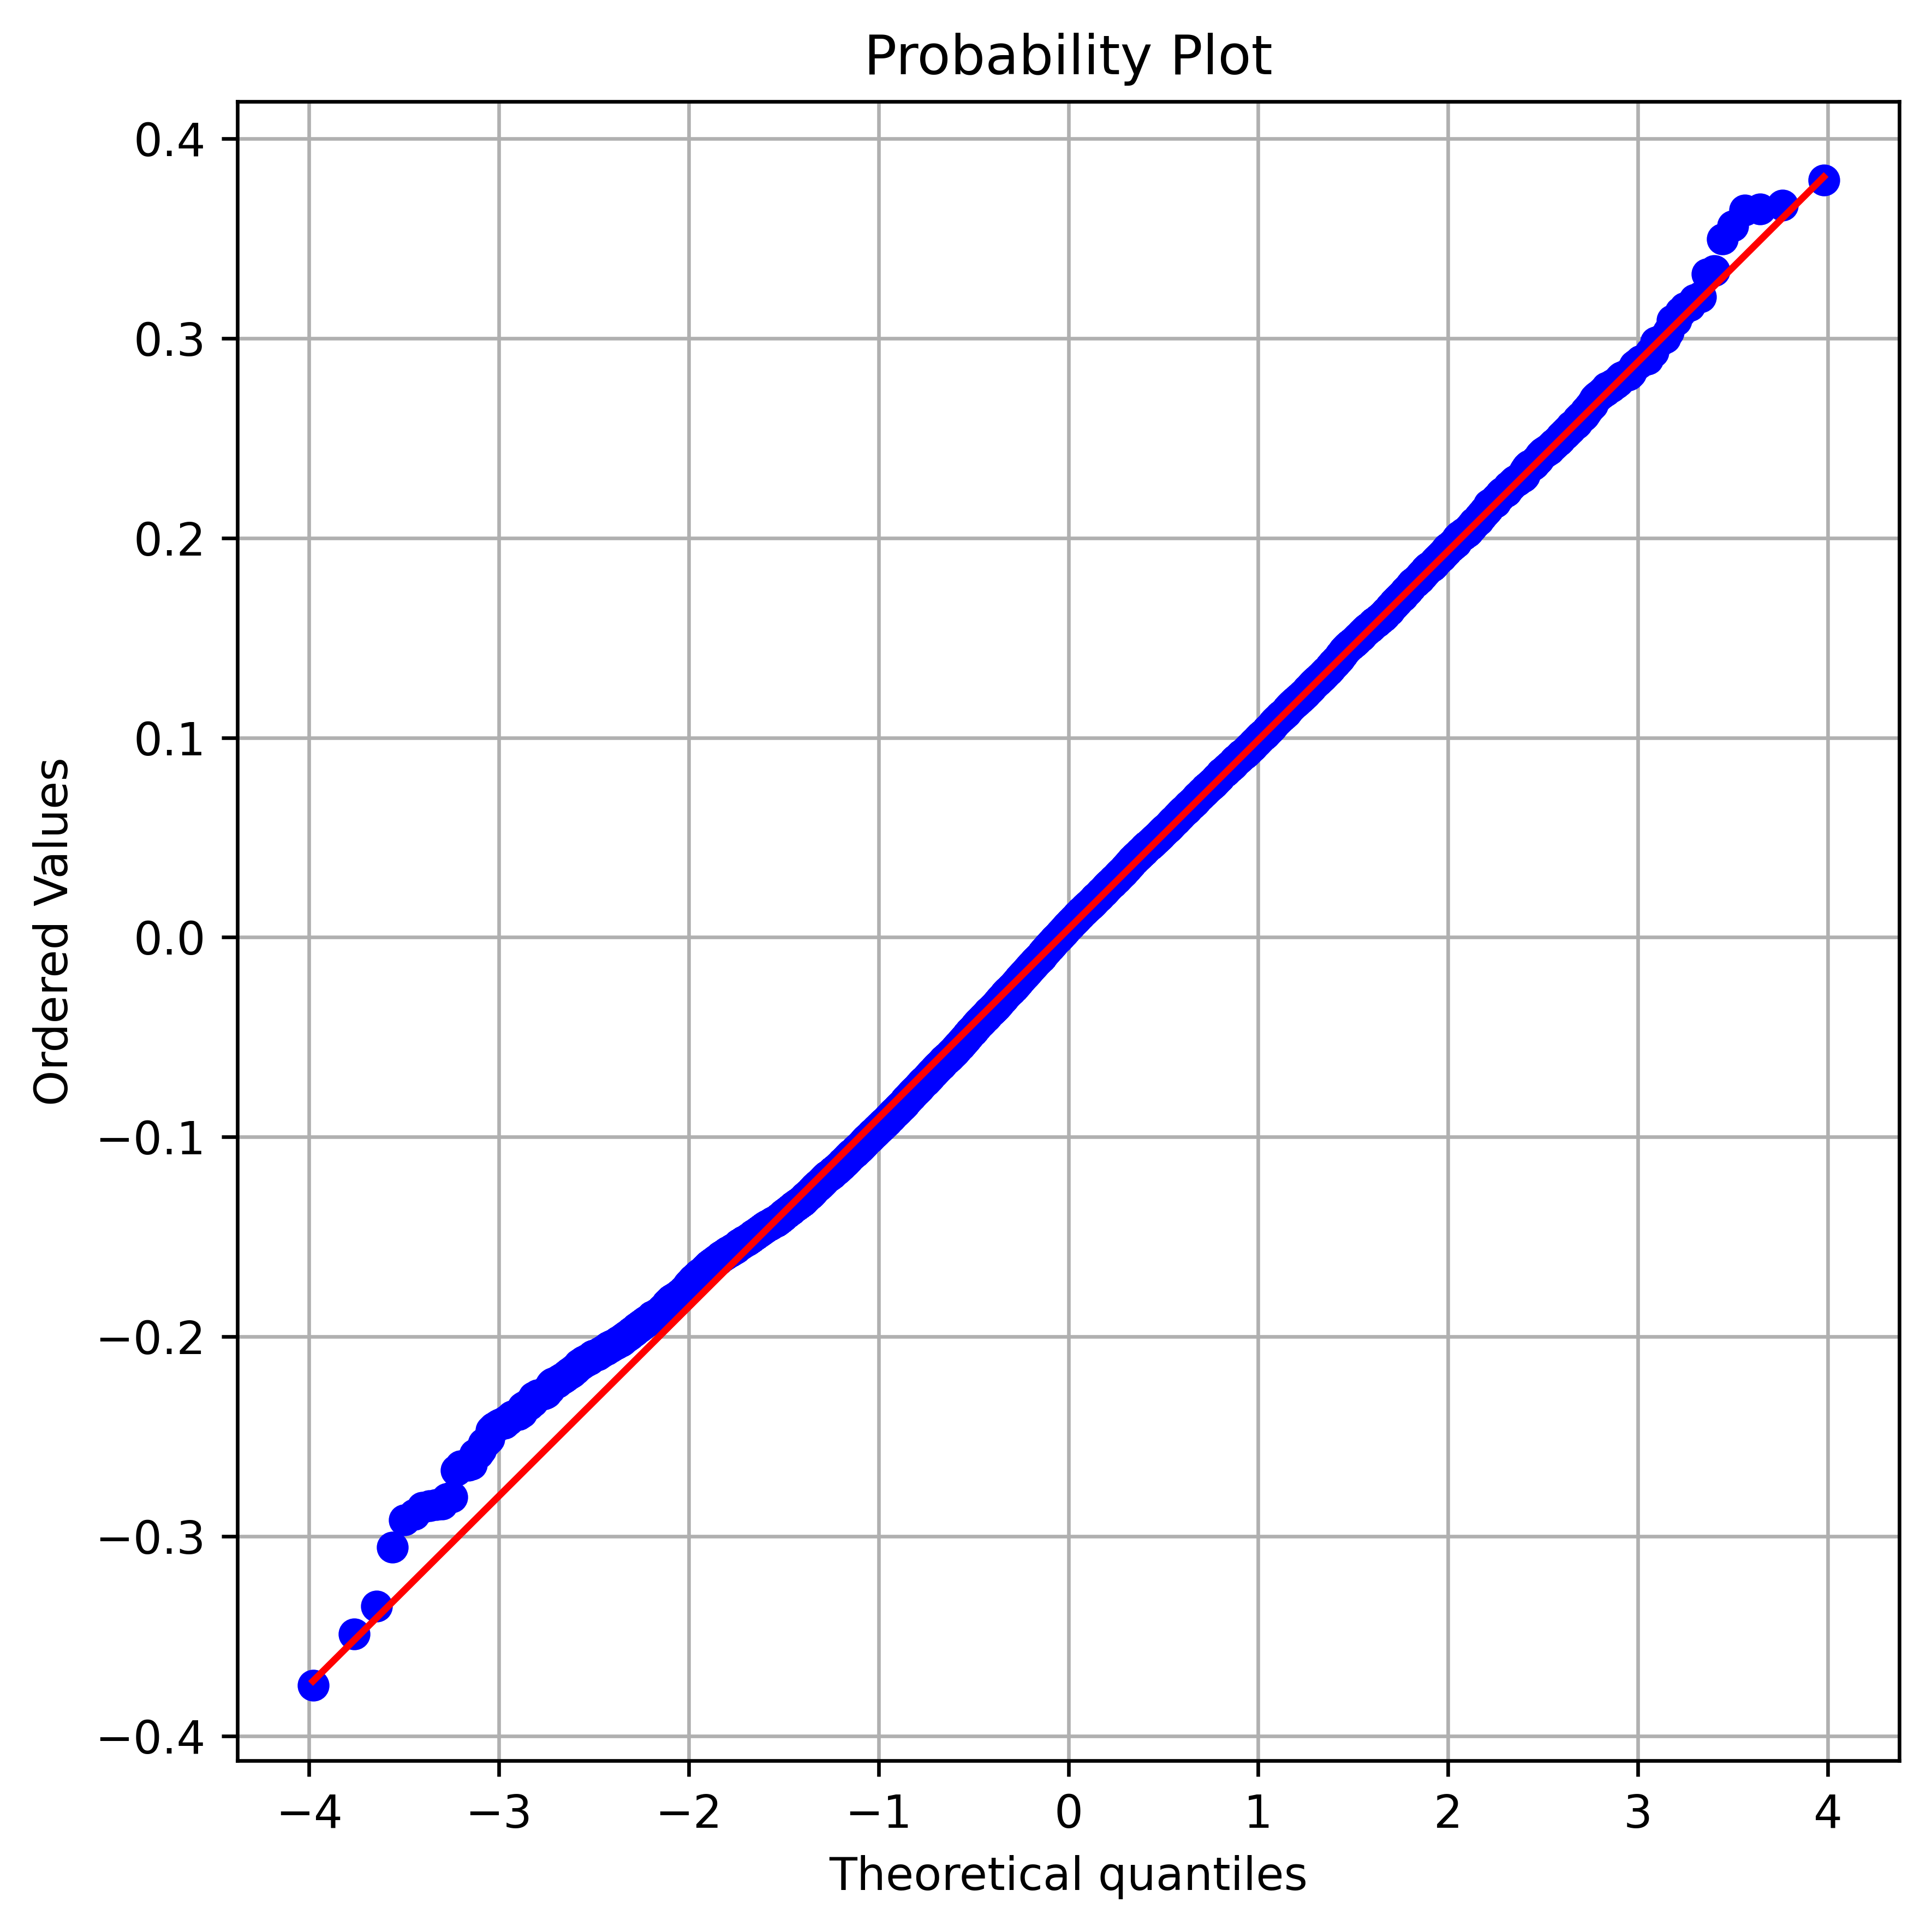

In [11]:
import scipy.stats as stats

plt.figure(figsize=(6, 6), dpi=600)
stats.probplot(residuals, dist="norm", plot=plt)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install lime

/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

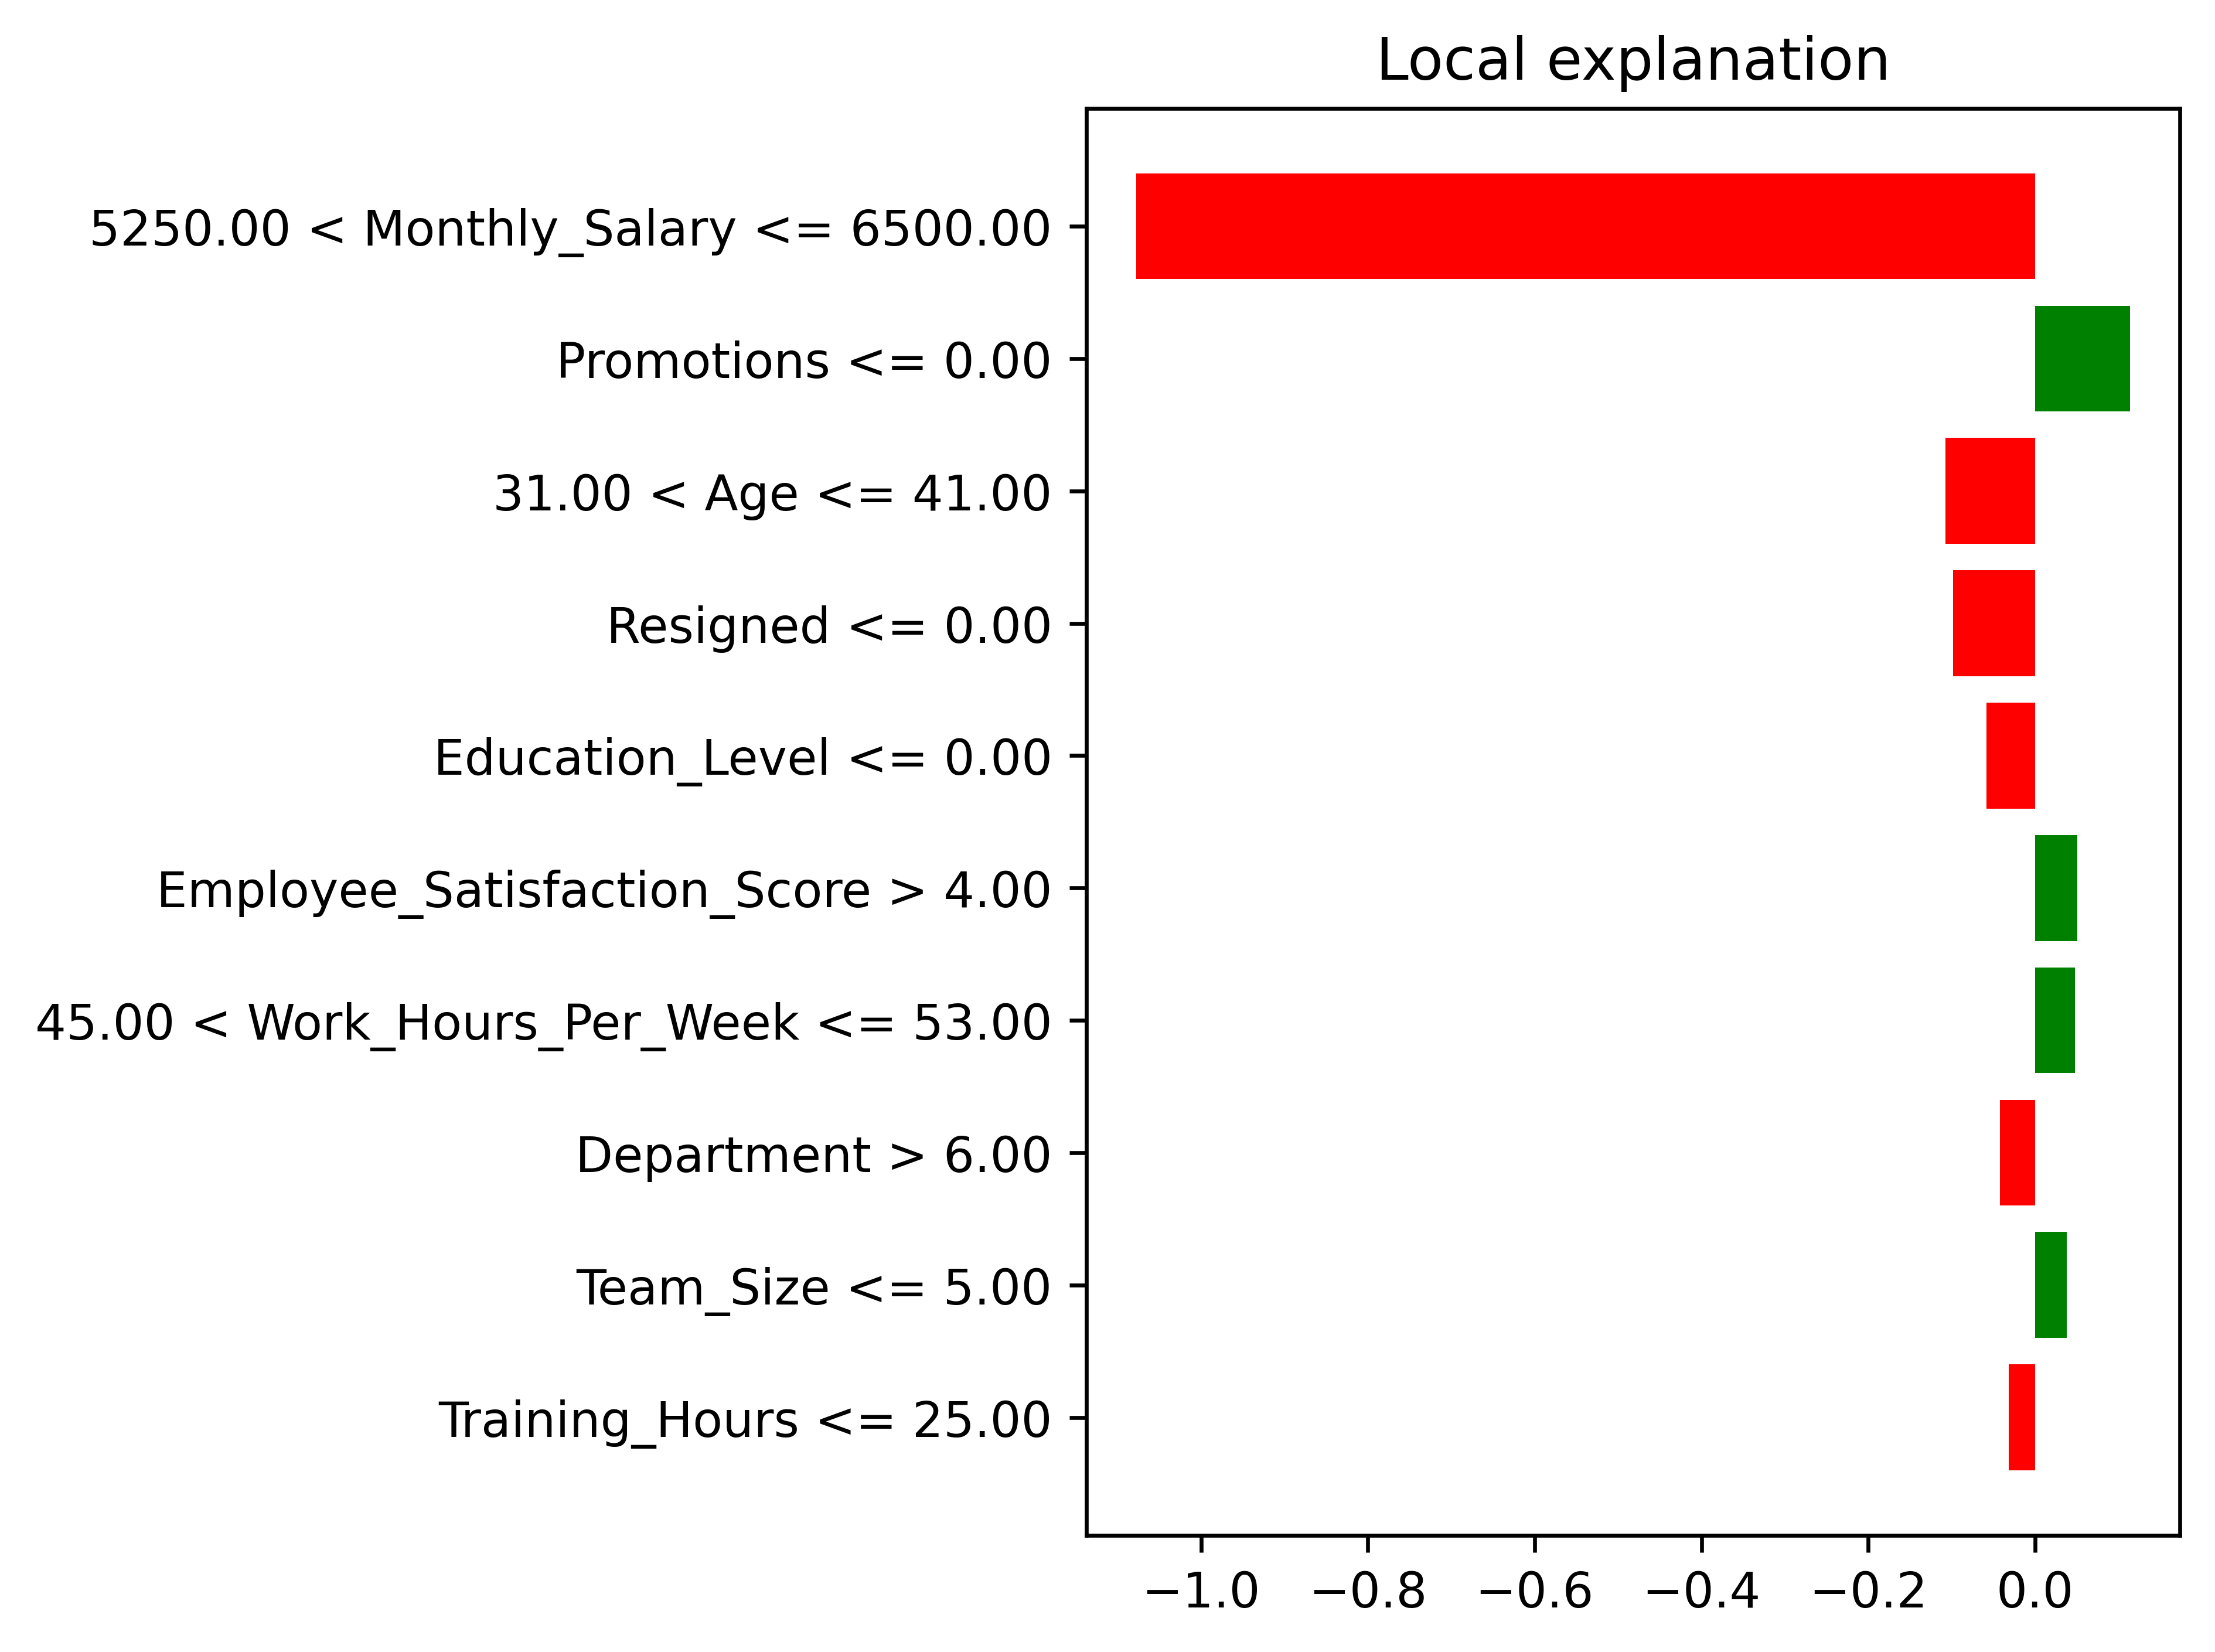

In [13]:
import lime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.preprocessing import LabelEncoder

# ✅ Prepare training data (excluding target)
X_train = train.drop(columns=["PerformanceScore"]).copy()
X_test = test.drop(columns=["PerformanceScore"]).copy()
y_test = test["PerformanceScore"]

# ✅ Encode categorical features
categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# ✅ Define predict function compatible with LIME
def model_predict(data_as_array):
    df = pd.DataFrame(data_as_array, columns=X_train.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

# ✅ Initialize LIME Explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

# ✅ Explain a sample prediction (e.g., index 5)
sample_index = 5
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_index].values,
    predict_fn=model_predict,
    num_features=10
)

# ✅ Plot and Save
fig = lime_exp.as_pyplot_figure()
fig.set_dpi(600)
plt.tight_layout()
plt.savefig("lime_explanation_sample_5.png")
plt.show()


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on th

  0%|          | 0/100 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded[col] = X_encoded[col].fillna(NAN_CATEGORY).map(mapping["value"])
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col:

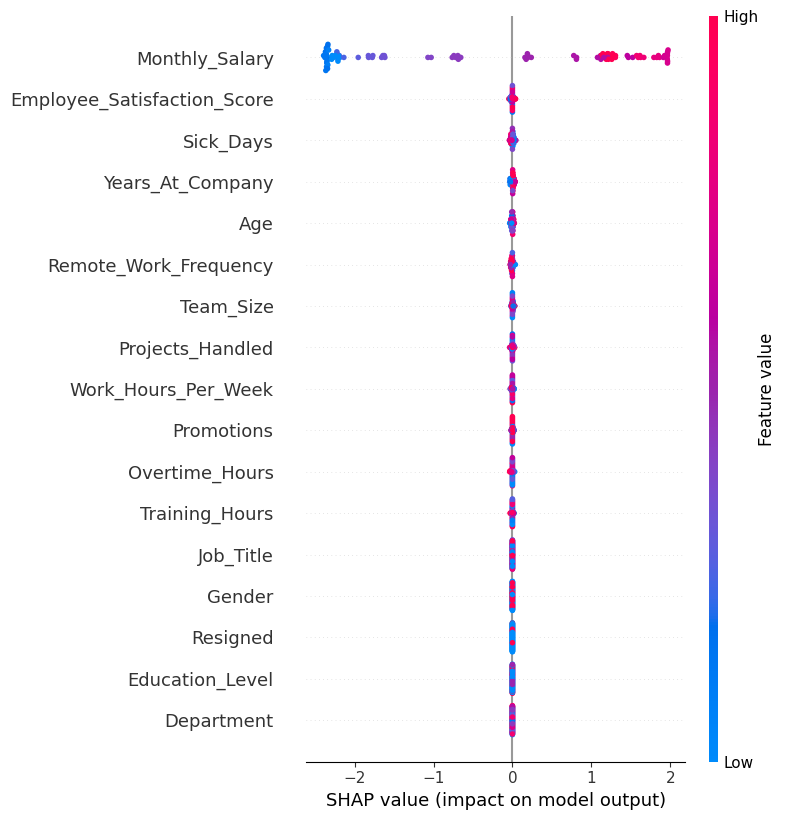

In [14]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# ✅ Prepare encoded test data
X_test_input = test.drop(columns=["PerformanceScore"]).copy()
categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
X_test_encoded = X_test_input.copy()

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(X_test_encoded[col])
    label_encoders[col] = le

# ✅ Sample a subset for performance
X_sample = X_test_encoded.sample(100, random_state=42)

# ✅ Define prediction function
def model_predict(data_array):
    df = pd.DataFrame(data_array, columns=X_sample.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

# ✅ KernelExplainer setup
background = X_sample.sample(10, random_state=42).values
explainer = shap.KernelExplainer(model_predict, background)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample.values)

# ✅ Plot SHAP Beeswarm
shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
plt.tight_layout()
plt.savefig("shap_beeswarm_plot.png", dpi=300)
plt.show()

In [15]:
shap_avg_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "Feature": X_sample.columns,
    "Mean |SHAP Value|": shap_avg_importance
}).sort_values("Mean |SHAP Value|", ascending=False)

print(importance_df.head(10))


                        Feature  Mean |SHAP Value|
6                Monthly_Salary           1.610012
15  Employee_Satisfaction_Score           0.013065
10                    Sick_Days           0.012595
4              Years_At_Company           0.011764
2                           Age           0.009691
11        Remote_Work_Frequency           0.008984
12                    Team_Size           0.007788
8              Projects_Handled           0.006571
7           Work_Hours_Per_Week           0.006125
14                   Promotions           0.005121


In [20]:
import pandas as pd
import numpy as np

# 📌 Sample 10 unseen rows from the test set
sample_df = test.sample(10, random_state=42).copy()

# Actual performance scores
y_true = sample_df["PerformanceScore"].values

# Predict using trained tabular_model
preds_df = tabular_model.predict(sample_df)

# Predicted performance scores
y_pred = preds_df["PerformanceScore_prediction"].values

# 📐 Compute MSE per sample
mse_per_sample = (y_true - y_pred) ** 2

# 📋 Create result table
result_table = pd.DataFrame({
    "Original Score": y_true,
    "Predicted Score": y_pred,
    "MSE": mse_per_sample
})

# Round values for readability
result_table = result_table.round(4)

# Show table
print(result_table)


   Original Score  Predicted Score     MSE
0               4           3.9273  0.0053
1               5           5.1525  0.0233
2               3           2.9257  0.0055
3               2           1.9203  0.0064
4               1           1.0977  0.0095
5               5           5.1527  0.0233
6               1           1.2036  0.0414
7               4           3.9955  0.0000
8               4           3.8696  0.0170
9               2           1.8883  0.0125


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value